In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("data/attacks.csv", encoding = "ISO-8859-1", dtype=object)

data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean and scrub de data to work with.
    - Verify the data columns available and its data
    - Rename and transform the data as needed, fill NaN values or replace it.

In [178]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [179]:
data.columns = [i.lower().replace(" ", "_").strip() for i in data.columns]

In [180]:
data.rename(columns = {"fatal_(y/n)":"death",}, inplace=True)

In [181]:
data['year'] = pd.to_numeric(data['year'].replace('0000', pd.NA, regex=False), errors='coerce')

In [182]:
average_year = data['year'].mean()

data['year'].fillna(average_year, inplace=True)

C:\Users\ateso\AppData\Local\Temp\ipykernel_10324\732275602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year'].fillna(average_year, inplace=True)


In [183]:
data['index'] = range(1, len(data) + 1)

In [184]:
data['year'] = data['year'].astype(int)

In [185]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [186]:
data['age'].fillna(data['age'].mean(), inplace=True)

C:\Users\ateso\AppData\Local\Temp\ipykernel_10324\1829737370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [187]:
data['year'] = data['year'].astype(int)

In [188]:
data.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,index
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN,1
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN,2
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN,3
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN,4
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN,5


# Drop the columns and raws that are not usefull.

In [189]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'death', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23', 'index'],
      dtype='object')

In [190]:
data.drop(['investigator_or_source','case_number', 'date', 'href_formula', 'pdf',  'location', 'name', 'time', 'href', 'unnamed:_22', 'original_order', 'case_number.2', 'case_number.1','unnamed:_23'], axis=1, inplace=True)


In [191]:
data = data.drop_duplicates(subset= columns_check, keep = "first")

In [170]:
columns_check = ['year', 'type', 'country', 'area',
       'activity', 'sex_', 'age', 'injury', 'death',
       'species_']

In [172]:
data['index'] = range(1, len(data) + 1)
    pass

C:\Users\ateso\AppData\Local\Temp\ipykernel_10324\1031297796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'] = range(1, len(data) + 1)


In [194]:
data.sort_values('year', inplace=True)

data.groupby("year")["age"].mean().round()


C:\Users\ateso\AppData\Local\Temp\ipykernel_10324\4236602184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('year', inplace=True)


year
5       27.0
77      27.0
500     27.0
1543    27.0
1554    27.0
        ... 
2014    29.0
2015    30.0
2016    32.0
2017    30.0
2018    31.0
Name: age, Length: 248, dtype: float64

# Create subsets of data to compartiment and visualize the DataFrame.

# Create an personalize the plots according to the DataFrame

- Search trough the data and include fillnan() or other methods if necessary.
- Unique values will need to be shown to understand how to organize the graphics, use .unique(), .mean(), .count()

In [195]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")


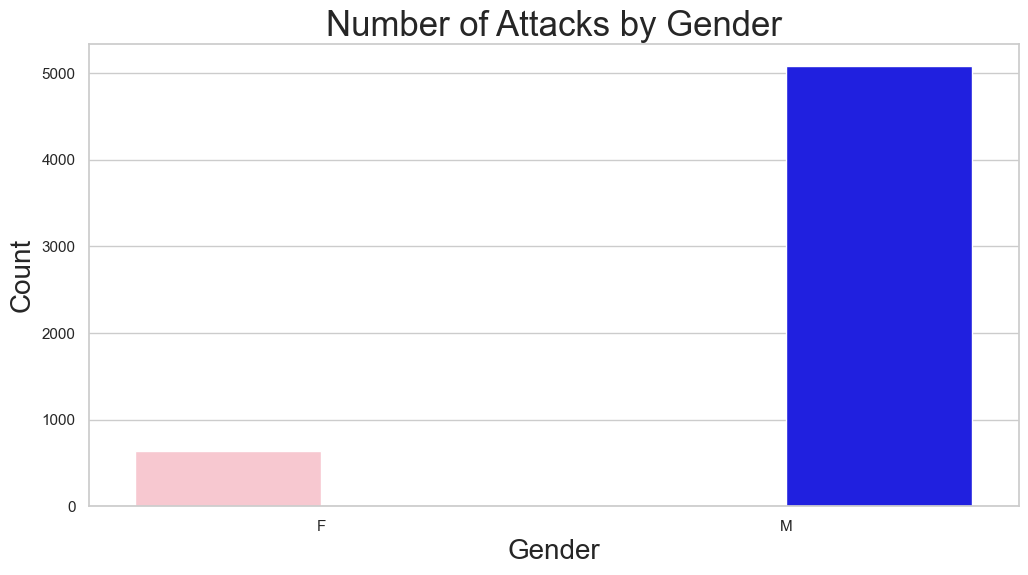

In [196]:

filtered_data = data[data['sex_'].isin(['F', 'M', 'undefined'])]


unique_values = filtered_data['sex_'].unique()


palette = {'M': 'blue', 'F': 'pink', 'undefined': 'gray'}


ax = sns.barplot(x='sex_', y='count', data=filtered_data.groupby('sex_').size().reset_index(name='count'), palette=palette, hue='sex_', dodge=True)

ax.set_title('Number of Attacks by Gender', fontsize=25 )
ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Count', fontsize=20);

In [197]:
data.describe()

,year,age,index
count,6285.000000,6285.000000,6285.000000
mean,1966.310581,27.368359,3150.270804
std,61.874740,10.181828,1820.143784
min,5.000000,1.000000,1.000000
25%,1946.000000,22.000000,1573.000000
50%,1977.000000,27.368359,3149.000000
75%,2005.000000,27.368359,4726.000000
max,2018.000000,87.000000,6303.000000


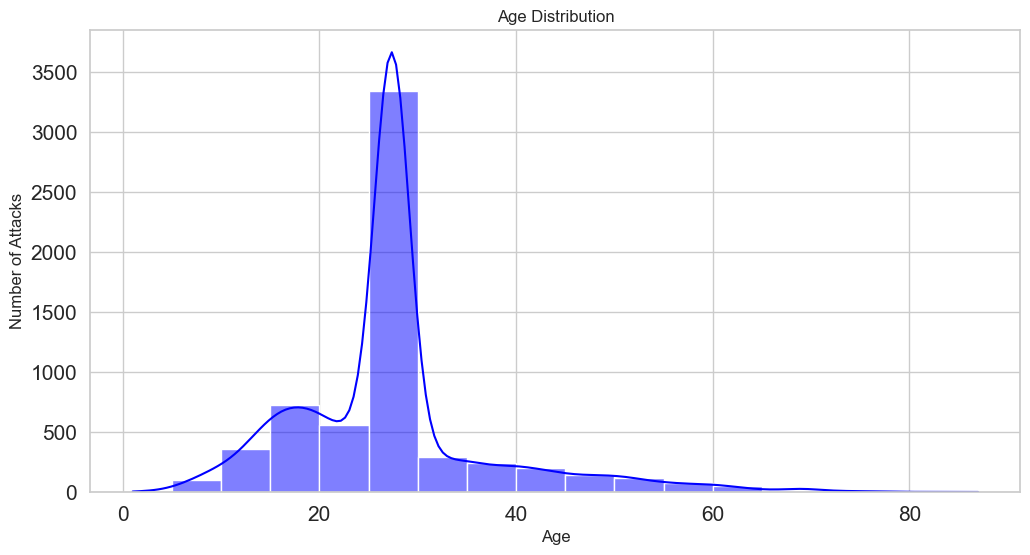

In [198]:
sns.histplot(data["age"], bins=range(5, 70, 5), kde=True, color='blue')

plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.title("Age Distribution")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

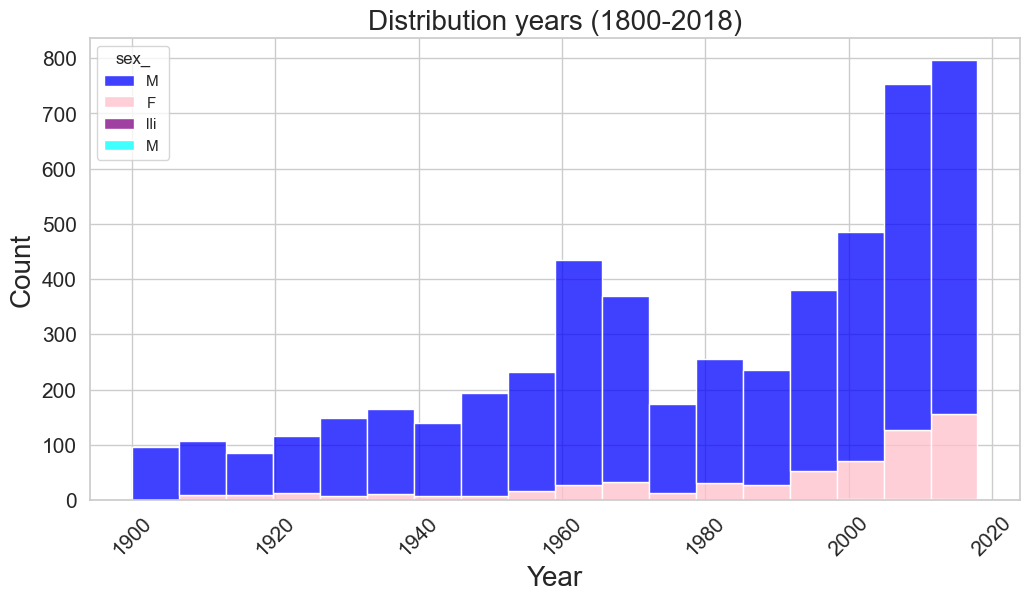

In [199]:
filtered_data = data[(data['year'] >= 1900) & (data['year'] <= 2018) & ~data['sex_'].isin(['N', '.', 'undefined'])]

palette = {'M': 'blue', 'F': 'pink', 'M ': 'cyan', 'lli': 'purple'}

sns.histplot(data=filtered_data, x='year', hue='sex_', multiple="stack", bins=18, palette=palette)

plt.title('Distribution years (1800-2018)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45);




In [200]:
data["type"].unique()

array(['Unprovoked', 'Invalid', 'Boat', 'Sea Disaster', 'Provoked',
       'Boating', nan, 'Boatomg', 'Questionable'], dtype=object)

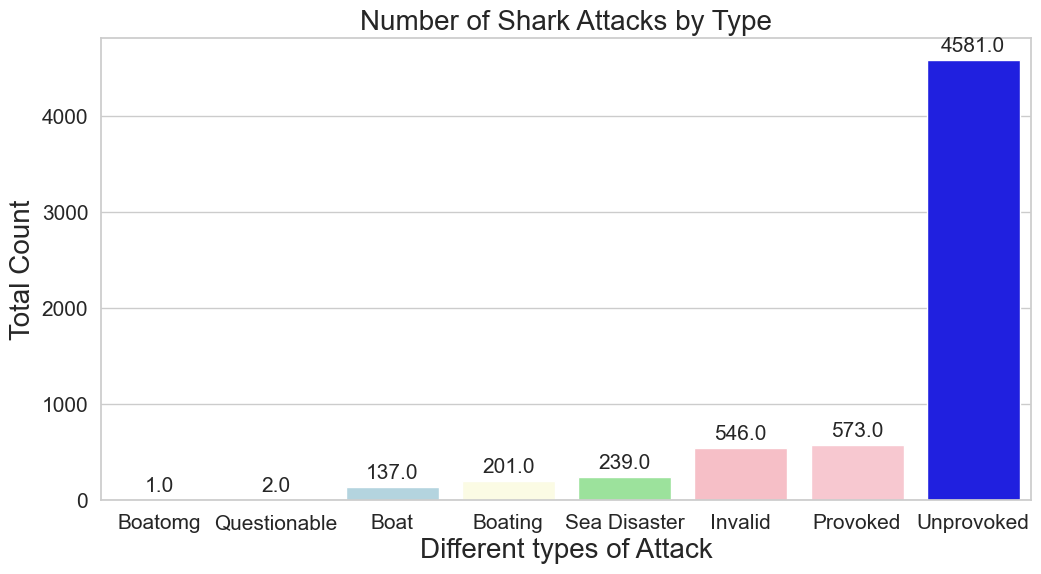

In [201]:

custom_palette = {'Unprovoked': 'blue', 'Boat': 'lightblue', 'Provoked': 'pink', 'Invalid': 'lightpink', 'Sea Disaster': 'lightgreen', 'Boating': 'lightyellow', 'Boatomg': 'yellow', 'Questionable': 'lightgray'}

filtered_data = data[data['type'].isin(custom_palette.keys())]
sorted_data = filtered_data['type'].value_counts().index
reversed_data = list(reversed(sorted_data))

ax = sns.countplot(x='type', hue='type', data=filtered_data, palette=custom_palette, dodge=False, order=reversed_data, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)

ax.set_title('Number of Shark Attacks by Type', fontsize=20)
ax.set_xlabel('Different types of Attack', fontsize=20)
ax.set_ylabel('Total Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);


In [202]:
data["species_"].unique()

array([nan, 'Possibly white sharks', 'Questionable', ...,
       'Possibly a wobbegong', 'Juvenile bull shark',
       'Juvenile white shark,  2.7 to 3.2 m'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


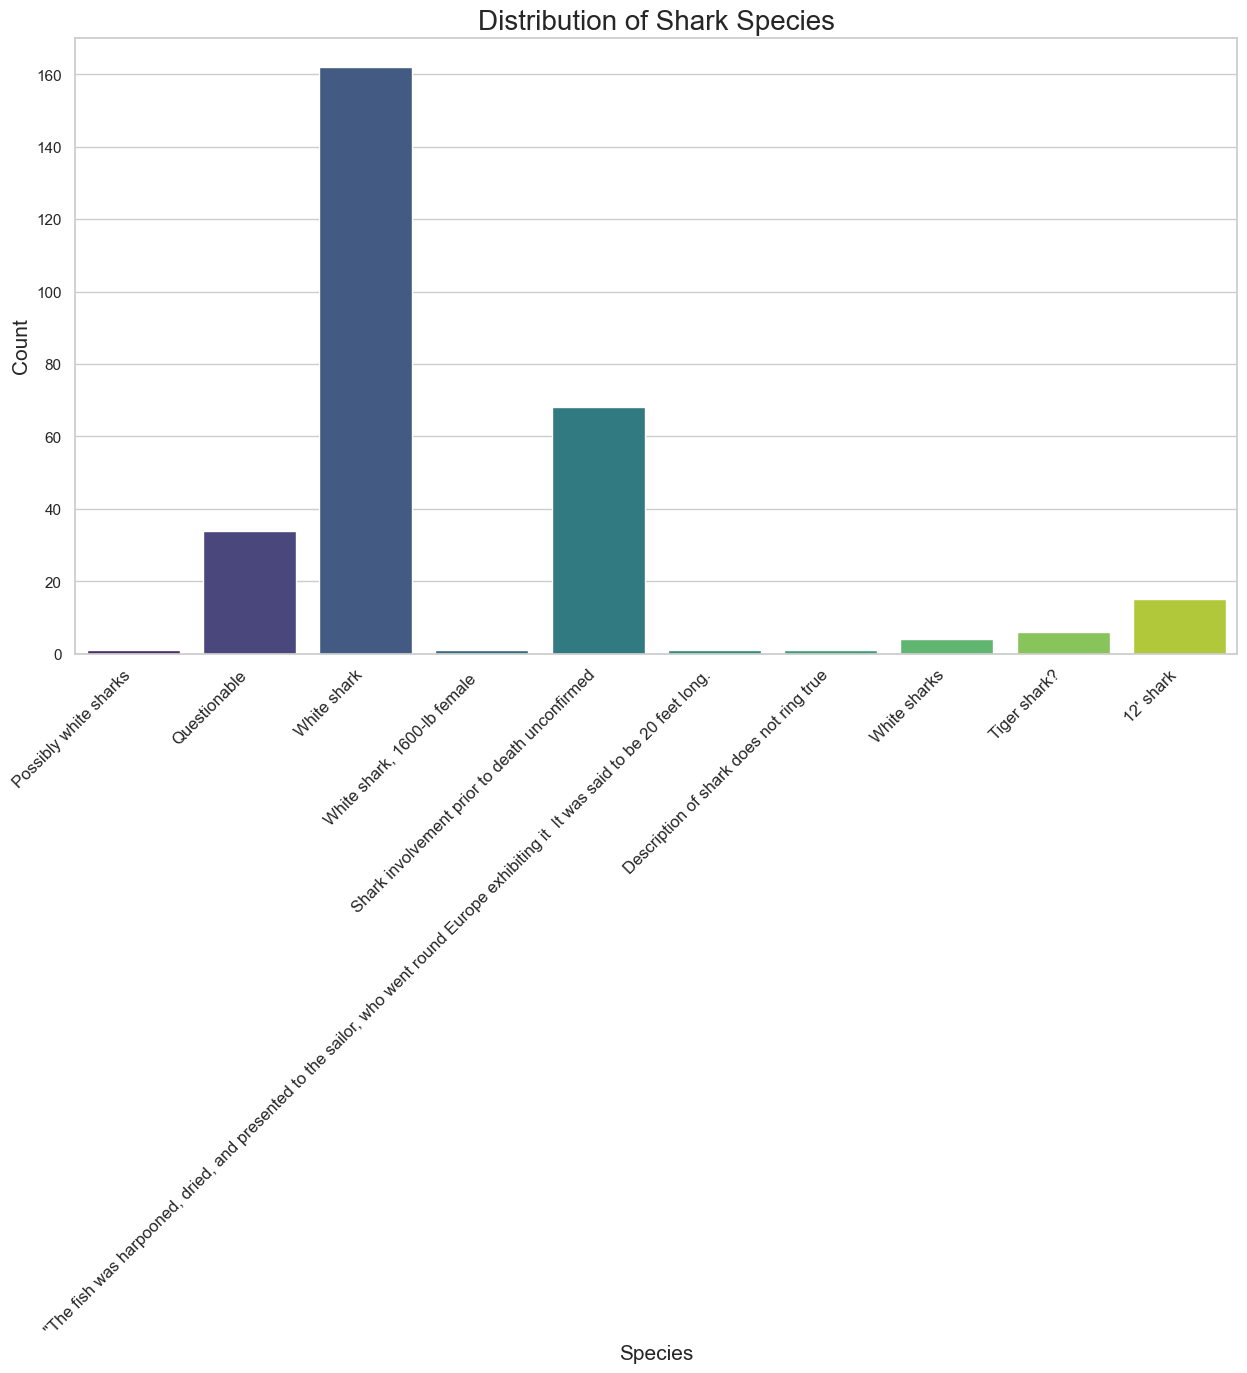

In [203]:
shark_type = data[data['species_'].notnull()] 
subset_values = shark_type['species_'].unique()[:10]  
filtered_data = shark_type[shark_type['species_'].isin(subset_values)]


plt.figure(figsize=(15, 8))
sns.countplot(x='species_', hue='species_', data=filtered_data, palette="viridis", dodge=False)

plt.title('Distribution of Shark Species', fontsize=20)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend().set_visible(False);

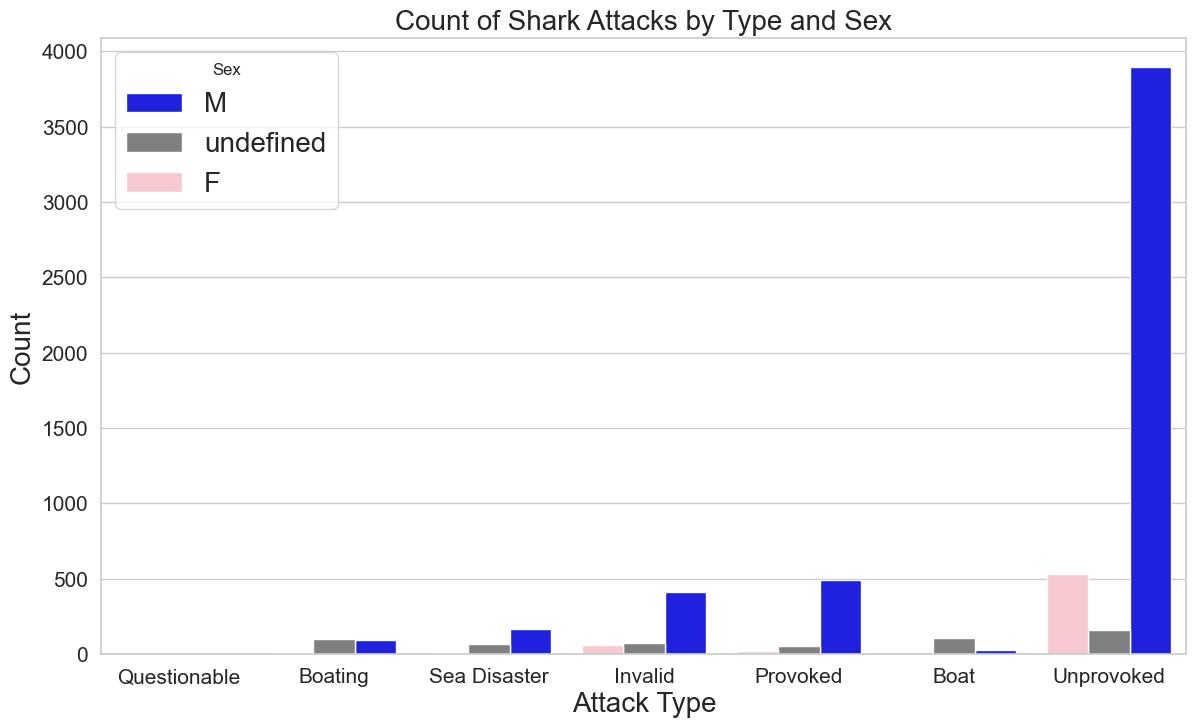

In [557]:
filtered_data = data[data['type'].isin(['Unprovoked', 'Boat', 'Provoked', 'Invalid', 'Sea Disaster', 'Boating', 'Questionable']) &
                      data['sex_'].isin(['M', 'F', 'undefined'])]

plt.figure(figsize=(14, 8))
sns.countplot(x='type', data=filtered_data, hue='sex_', palette={'M': 'blue', 'F': 'pink', 'undefined': 'grey'})

plt.title('Count of Shark Attacks by Type and Sex', fontsize=20)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(title='Sex', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().invert_xaxis()

# Show the plot
plt.show()



In [204]:
data['death'] = data['death'].str.strip()
data = data.dropna(subset=['death'])

valid_death_values = ['Y', 'N']
data = data[data['death'].isin(valid_death_values)]


C:\Users\ateso\AppData\Local\Temp\ipykernel_10324\3549271203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['death'] = data['death'].str.strip()


In [205]:
data["death"].unique()

array(['N', 'Y'], dtype=object)

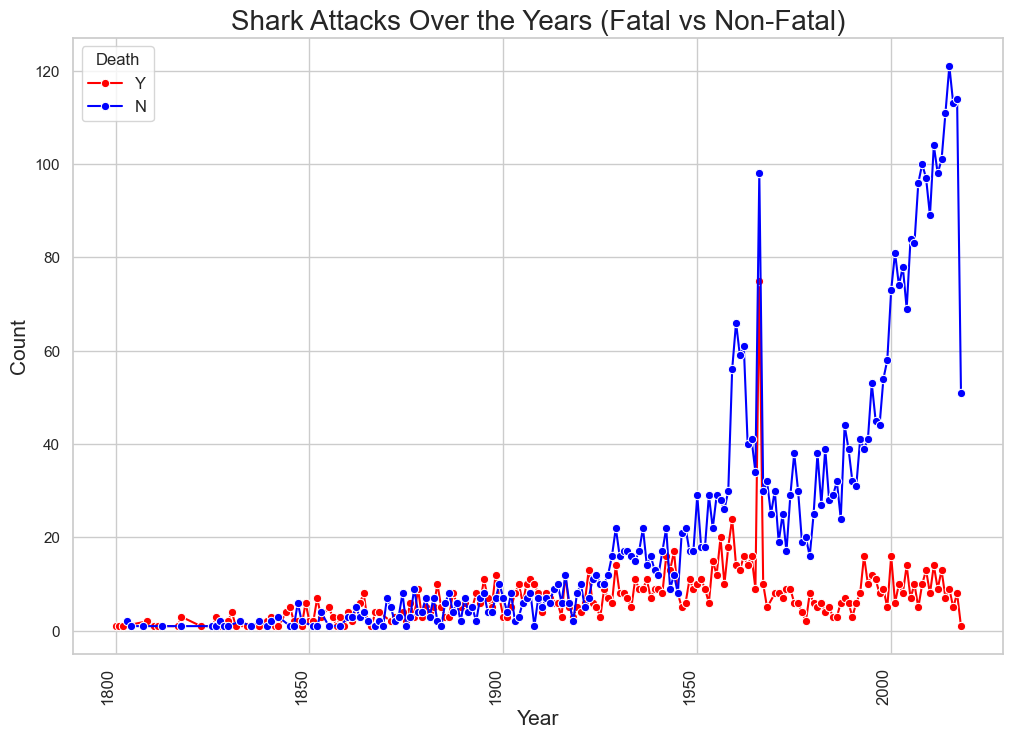

In [210]:
subset_data = data[data['death'].isin(['Y', 'N'])]

subset_data = subset_data[(subset_data['year'] >= 1800) & (subset_data['year'] <= 2020)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='value', hue='death', data=subset_data.groupby(['year', 'death']).size().reset_index(name='value'), palette=['red', 'blue'], marker='o')

plt.title('Shark Attacks Over the Years (Fatal vs Non-Fatal)', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.legend(title='Death', fontsize=12)

# Show the plot
plt.show()



In [208]:
attacks_by_country = data['country'].value_counts().reset_index()
attacks_by_country.columns = ['country', 'total_attacks']

print(attacks_by_country)

              country  total_attacks
0                 USA           2020
1           AUSTRALIA           1203
2        SOUTH AFRICA            513
3    PAPUA NEW GUINEA            130
4         NEW ZEALAND            115
..                ...            ...
196          SLOVENIA              1
197           CURACAO              1
198           ICELAND              1
199        CAPE VERDE              1
200          MALDIVES              1

[201 rows x 2 columns]


Text(0, 0.5, 'Country')

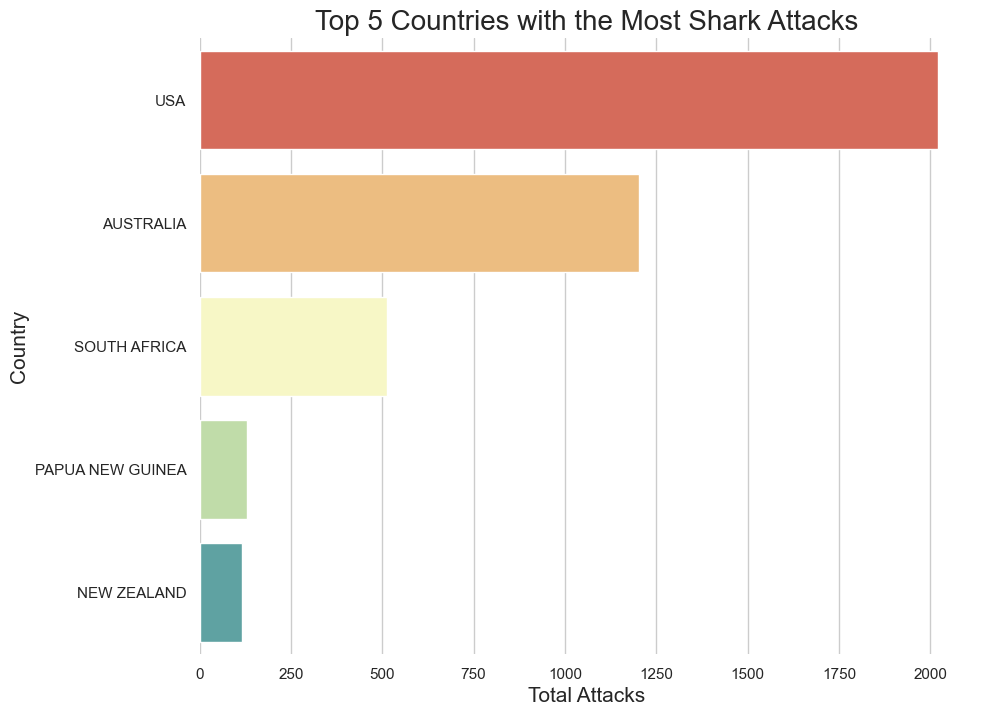

In [209]:
attacks_by_country = attacks_by_country.sort_values(by='total_attacks', ascending=False)

top_5_countries = attacks_by_country.head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='total_attacks', y='country', hue="country", data=top_5_countries, palette="Spectral")

sns.despine(left=True, bottom=True)
plt.title('Top 5 Countries with the Most Shark Attacks', fontsize=20)
plt.xlabel('Total Attacks', fontsize=15)
plt.ylabel('Country', fontsize=15)
